### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### 2. Loading the Data
Load the data set `data/aarhusbolig_2023-04-19.csv` into a dataframe.

In [2]:
df = pd.read_csv("data/aarhusbolig_2023-04-19.csv")

### 3. Analysing the Data
Show the dataframe to ensure that the data looks correct.

In [3]:
df.head()

,listingid,companyid,company,price,url,long,lat,address,type,rooms,...,listings,text,deposit,rent,electricity,heat,water,tv_internet,b-ordning,other
0,4023,31,bk-aarhus,6897,https://aarhusbolig.dk/afdelinger/?bolignr=402...,56.167299,10.189047,Afd. 1 Paludan Müllers Vej/Jens Baggesens Vej,Lejlighed,2,...,201.0,Husdyr: Det er tilladt af have en lille hund (...,10600.0,5366.0,NaN,691.0,200.0,205.0,NaN,435.0
1,3003,31,bk-aarhus,7642,https://aarhusbolig.dk/afdelinger/?bolignr=300...,56.167299,10.189047,Afd. 1 Paludan Müllers Vej/Jens Baggesens Vej,Lejlighed,3,...,75.0,Husdyr: Det er tilladt af have en lille hund (...,11100.0,5790.0,NaN,795.0,219.0,205.0,NaN,633.0
2,34,31,bk-aarhus,8304,https://aarhusbolig.dk/afdelinger/?bolignr=34&...,56.178432,10.195098,Afd. 2 Haugesundsvej m.fl.,Rækkehus,3,...,2.0,Husdyr: Det er tilladt at holde husdyr.Udgifte...,25000.0,6033.0,NaN,NaN,NaN,450.0,NaN,1821.0
3,14,31,bk-aarhus,7619,https://aarhusbolig.dk/afdelinger/?bolignr=14&...,56.178432,10.195098,Afd. 2 Haugesundsvej m.fl.,Rækkehus,4,...,34.0,Husdyr: Det er tilladt at holde husdyr.Udgifte...,25000.0,6033.0,NaN,NaN,NaN,NaN,NaN,1586.0
4,258,31,bk-aarhus,3119,https://aarhusbolig.dk/afdelinger/?bolignr=258...,56.167897,10.184841,Afd. 3 Viggo Stuckenbergs Vej,Lejlighed,1,...,15.0,Husdyr: Det er tilladt at holde højest 2 neutr...,3920.0,1915.0,NaN,241.0,83.0,NaN,NaN,880.0


Show the details of the dataframe. You can use the following `show_details(dataframe)` method.<br>
In this notebook, you can use `show_details(dataframe)` at any point after this block to see what your dataframe looks like.<br>
You can also additionally use other methods that you know or find to get more details about the dataframe.

In [4]:
def isNull(x):
    return x.isna().sum()
        
def show_details(dataframe):
    return dataframe.agg(['dtype', 'count', 'nunique', isNull])
    
show_details(df)

,listingid,companyid,company,price,url,long,lat,address,type,rooms,...,listings,text,deposit,rent,electricity,heat,water,tv_internet,b-ordning,other
dtype,int64,int64,object,int64,object,float64,float64,object,object,int64,...,float64,object,float64,float64,float64,float64,float64,float64,float64,float64
count,2113,2113,2113,2113,2113,2105,2105,2113,2113,2113,...,2109,2107,2107,2113,335,1146,1364,518,127,635
nunique,1199,12,12,1786,2113,442,441,451,8,6,...,153,450,1025,1733,194,496,529,49,92,380
isNull,0,0,0,0,0,8,8,0,0,0,...,4,6,6,0,1778,967,749,1595,1986,1478


### 4. Cleaning the Data
Clean the data with the following aspects (Not all of them may be needed):
- `.drop(columns, axis=1)` Remove __columns__ that you think are irrelevant.
- `.dropna(columns)` Remove __rows__ with __null values__ in that column if you think that the row NEEDS a value in that column.
- `.fillna(dictionary)` Fill null values with __default values__ if you think a default value makes sense.
- `.astype(type)` Parse data into a __different type__ (e.g. string to int) to be able to work on the proper typed values. This should be your last step!
- `...` Apply other cleanings if you feel they are needed. e.g. cleaning strings specifically, rounding values, etc.

In [5]:
# Remove columns that you think are irrelevant.
df = df.drop(['address', 'text', 'electricity', 'heat', 'water', 'tv_internet', 'b-ordning', 'other'], axis=1)
show_details(df)

,listingid,companyid,company,price,url,long,lat,type,rooms,size_m2,listings,deposit,rent
dtype,int64,int64,object,int64,object,float64,float64,object,int64,int64,float64,float64,float64
count,2113,2113,2113,2113,2113,2105,2105,2113,2113,2113,2109,2107,2113
nunique,1199,12,12,1786,2113,442,441,8,6,119,153,1025,1733
isNull,0,0,0,0,0,8,8,0,0,0,4,6,0


In [6]:
# Fill null values with default values if you think a default value makes sense.
df = df.fillna({
    "deposit": 0,
    "rent": 0,
    "listings": 1
})
show_details(df)

,listingid,companyid,company,price,url,long,lat,type,rooms,size_m2,listings,deposit,rent
dtype,int64,int64,object,int64,object,float64,float64,object,int64,int64,float64,float64,float64
count,2113,2113,2113,2113,2113,2105,2105,2113,2113,2113,2113,2113,2113
nunique,1199,12,12,1786,2113,442,441,8,6,119,153,1026,1733
isNull,0,0,0,0,0,8,8,0,0,0,0,0,0


In [7]:
# Parse data into a different type (e.g. string to int) to be able to work on the proper typed values.
columns = ["listings", "deposit", "rent"]
df[columns] = df[columns].astype(int)
show_details(df)

,listingid,companyid,company,price,url,long,lat,type,rooms,size_m2,listings,deposit,rent
dtype,int64,int64,object,int64,object,float64,float64,object,int64,int64,int32,int32,int32
count,2113,2113,2113,2113,2113,2105,2105,2113,2113,2113,2113,2113,2113
nunique,1199,12,12,1786,2113,442,441,8,6,119,153,1026,1733
isNull,0,0,0,0,0,8,8,0,0,0,0,0,0


Save as new file to `data/aarhusbolig_cleaned.csv`, so you don't have to repeat all the cleaning process again.<br>
> Make sure to set `index=False` to avoid having index numbers as a new column.

In [8]:
df.to_csv('data/aarhusbolig_cleaned.csv', index=False)

### 5. Exploratory Data Analysis (EDA)
Get insight on each column depending on its type:
- For strings: What are the different values? Is each row unique? Are they nominal or ordinal values?
- For numbers: Are the values discrete or continuous? What are the ranges (min, max, mean)?
- For dates/times: What are the ranges (lowest, highest)? How detailed are they?
- Can you see an index column? (Column which identifies a row uniquely. It does not need to be called *id*)?
> __Notice:__ Since you saved the cleaned dataset as a new file, you don't need to run steps 1-4 anymore to clean it every time. <br>
> You can just load the cleaned dataset and run your analysis and queries on that.

In [9]:
df = pd.read_csv('data/aarhusbolig_cleaned.csv')
show_details(df)

,listingid,companyid,company,price,url,long,lat,type,rooms,size_m2,listings,deposit,rent
dtype,int64,int64,object,int64,object,float64,float64,object,int64,int64,int64,int64,int64
count,2113,2113,2113,2113,2113,2105,2105,2113,2113,2113,2113,2113,2113
nunique,1199,12,12,1786,2113,442,441,8,6,119,153,1026,1733
isNull,0,0,0,0,0,8,8,0,0,0,0,0,0


In [10]:
listingid_info = df["listingid"].agg(['min', 'max', 'count'])
print(f"We have {listingid_info['count']} rows. The values range from {listingid_info['min']} to {listingid_info['max']}.")

We have 2113 rows. The values range from 1 to 9999.


In [11]:
companies_nunique = df["company"].nunique()
companies_top_3 = df["company"].value_counts()[:3]
print(f"There are {companies_nunique} companies. The three most occurring are:")
print(companies_top_3.to_string())

There are 12 companies. The three most occurring are:
alboa        388
aabnet       259
bk-aarhus    246


In [12]:
price_info = df["price"].agg(['min', 'max'])
print(f"The prices range from {price_info['min']} kr. to {price_info['max']} kr.")

The prices range from 1915 kr. to 14300 kr.


In [13]:
type_nunique = df["type"].nunique()
type_top_3 = df["type"].value_counts()[:3]
print(f"There are {type_nunique} housing types. The three most occurring are:")
print(type_top_3.to_string())

There are 8 housing types. The three most occurring are:
Lejlighed        1238
Rækkehus          661
Seniorboliger     147


In [14]:
size_info = df["size_m2"].agg(['min', 'max'])
print(f"The prices range from {size_info['min']}m² to {size_info['max']}m².")

The prices range from 23m² to 148m².


In [15]:
rooms_info = df["rooms"].agg(['min', 'max'])
print(f"The room numbers range from {rooms_info['min']} to {rooms_info['max']}.")

The room numbers range from 1 to 6.


### 6. Visualisation
To create visuals, you create more queries and plot them.<br>
Plot information that is relevant for the housing market. Here are some ideas for plots:
- How many listings per listing type exist?
- What does the price distribution for all listings look like?
- What does the price distribution per listing type look like?
- What does the price distribution by room numbers look like?
- What does the price distribution by room numbers for only apartments look like?
- What is the price distribution per company?
- Hard question: Where are the apartments located? Show a map.

Choose the ones that interest you the most and plot them with an appropriate chart type (bar? horizontal bar? box-plot? etc.)

In [16]:
# This line applies a specific visual style to the plots. For a full list, you can call `plt.style.available`.
plt.style.use("seaborn-v0_8")

In [17]:
# With this, you can annotate bars in bar plot with values. It requires you to save "ax"
def show_bar_values(plot):
    for container in plot.containers:
        plot.bar_label(container, padding=5)

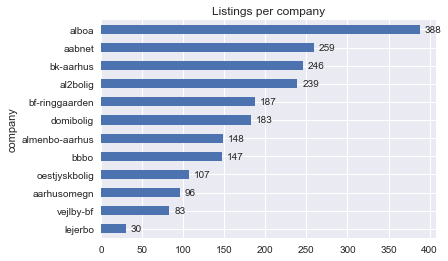

In [18]:
# This is an example for one query and plot. It shows how many listings each company has.
plot = df.groupby("company") \
    .size() \
    .sort_values() \
    .plot.barh(title="Listings per company")

show_bar_values(plot)

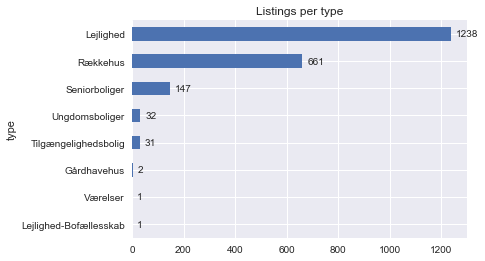

In [19]:
# How many listings per listing type exist?
plot = df.groupby("type") \
    .size() \
    .sort_values() \
    .plot.barh(title="Listings per type")

show_bar_values(plot)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

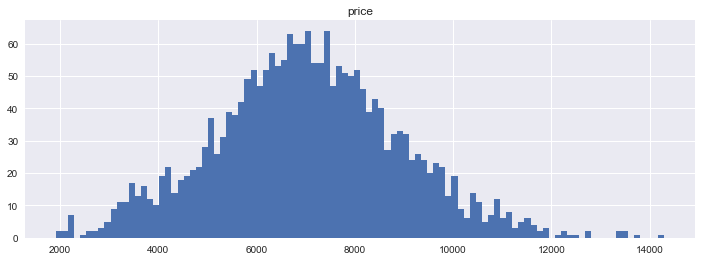

In [20]:
# What does the price distribution for all listings look like?
df.hist(column="price", figsize=(12,4), bins=100)

price    Axes(0.125,0.125;0.775x0.755)
dtype: object

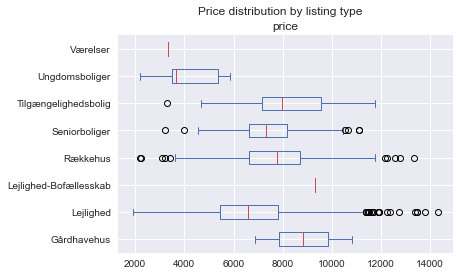

In [21]:
# What does the price distribution per listing type look like?
df.plot.box(
    vert=False,
    column="price", 
    by="type", 
    title="Price distribution by listing type")

price    Axes(0.125,0.125;0.775x0.755)
dtype: object

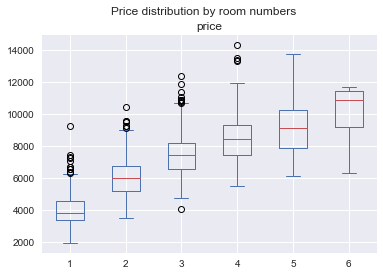

In [22]:
# What does the price distribution by room numbers look like?
df.plot.box(
    column="price", 
    by="rooms", 
    title="Price distribution by room numbers")

,price
type,
Lejlighed,"Axes(0.125,0.125;0.775x0.755)"


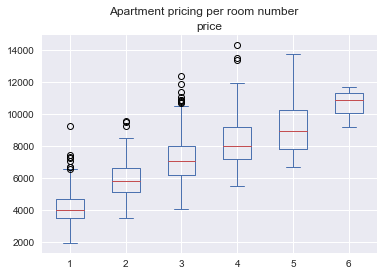

In [23]:
# What does the price distribution by room numbers for only apartments look like?
df[df["type"] == "Lejlighed"] \
    .groupby("type") \
    .plot.box(
        by="rooms", 
        column="price", 
        title="Apartment pricing per room number")

<Axes: title={'center': 'Listings per company'}, ylabel='company'>

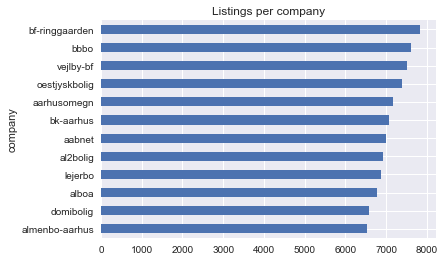

In [24]:
# What is the price distribution per company?
df.groupby("company")["price"] \
    .mean() \
    .sort_values() \
    .plot.barh(title="Listings per company")

price    Axes(0.125,0.125;0.775x0.755)
dtype: object

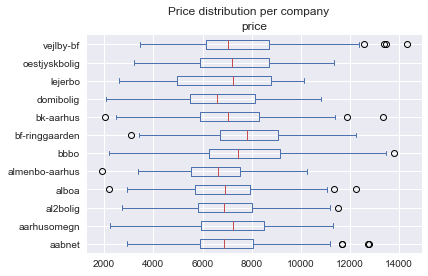

In [25]:
# What is the price distribution per company? Better way:
df.plot.box(
    by="company", 
    column="price", 
    vert=False,
    title="Price distribution per company")

### 7. Interpretation
Now having the results from your EDA and your plots, you can interpret the data and the visuals, and write your report. You can save the plots by simply dragging them into your folder. The report is usually not something you do in this notebook. Instead, you use a word document, google docs, latex, or similar. For this homework, use the box below to write down what you see and what it means for a company, or even someone who is looking for a place to live in Aarhus.
> Avoid "pretty tools" like Canva! These will make you waste time on the looks and end up looking unprofessional if you are not skilled yet.
> Most companies have their own templates, which are usually Word documents.

In [26]:
fig = px.scatter_mapbox(df, lat='long', lon='lat', hover_name="type")
fig.update_layout(
    mapbox = dict(style="carto-positron")
)

fig.show()